In [1]:
#import SWAPLINEmain

import datetime
import seaborn as sns
import pandas as pd
import pickle as pickle
from scipy.spatial.distance import cdist, pdist, squareform
#import backspinpy
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
from sklearn import preprocessing
import matplotlib.patches as mpatches
#from numpy import in1d
%pylab inline
today=f"{datetime.datetime.now():%Y-%m-%d-%I:%M%p}"
today

Populating the interactive namespace from numpy and matplotlib


'2022-03-01-12:35PM'

In [154]:
dfpfc = pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/TCGA_GBM/TCGA_GBM_AglientRPKMwithSubtype.tab", index_col =0 ,header=0, sep="\t")
dfpfc.shape

<ipython-input-154-df670a864594>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,118,119,120,121,122,123,125,126,127,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,2

(17815, 548)

In [155]:
dfpfc.tail()

,TCGA-02-0001,TCGA-02-0003,TCGA-02-0004,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,...,TCGA-76-4931,TCGA-76-4932,TCGA-76-4934,TCGA-76-4935,TCGA-76-6191,TCGA-76-6193,TCGA-76-6282,TCGA-76-6285,TCGA-81-5910,TCGA-87-5896
SERPINH1,-0.873,-1.3273125,1.749125,-0.7268125,-1.2459375,-0.9459375,-1.4773125,-0.9420000000000001,-1.6265,0.331375,...,-0.8755625,-0.8140625,-1.75475,-1.47875,-0.08125,0.2506875,-0.373,-0.8004375,-0.8035625,0.112125
NFIX,0.9979230769230001,1.58415384615,0.554692307692,1.35130769231,2.63907692308,2.08023076923,1.60015384615,1.92307692308,2.20661538462,1.0386923076899999,...,2.238,1.4585384615399999,1.18869230769,2.7194615384599996,1.14646153846,1.31161538462,1.4903846153799998,1.39592307692,0.973692307692,2.14069230769
SELP,0.205125,0.157875,1.064375,0.3145,0.15975,0.12925,0.150125,0.0925,0.219375,0.239,...,-0.8261428571430001,0.206625,0.5924,0.290625,0.45875,0.884375,1.405,-0.47357142857100004,1.12925,-0.26725
SELS,-0.0121818181818,-0.0350909090909,0.695272727273,0.535909090909,0.673727272727,0.11454545454500001,-0.520909090909,0.285181818182,-0.42545454545500005,0.544636363636,...,0.520272727273,0.338181818182,0.572909090909,-0.364,-0.0026363636363600004,0.314727272727,0.131545454545,0.037909090909099996,0.320454545455,0.5660000000000001
Unnamed: 1,Classical,Proneural,Mesenchymal,Mesenchymal,Proneural,Classical,G-CIMP,Proneural,G-CIMP,Classical,...,Classical,Proneural,Proneural,Proneural,Proneural,Mesenchymal,Mesenchymal,Proneural,Classical,Classical


In [156]:
dfpfc=dfpfc.T.loc[dfpfc.loc["Unnamed: 1"].isin(['Classical',

 'Mesenchymal',
 'Neural',
 'Proneural',])].T

In [157]:
dfpfcclus=dfpfc.iloc[-2:,:]
dfpfcclus.head()

,TCGA-02-0001,TCGA-02-0003,TCGA-02-0004,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0011,TCGA-02-0015,TCGA-02-0016,TCGA-02-0021,...,TCGA-76-4931,TCGA-76-4932,TCGA-76-4934,TCGA-76-4935,TCGA-76-6191,TCGA-76-6193,TCGA-76-6282,TCGA-76-6285,TCGA-81-5910,TCGA-87-5896
SELS,-0.0121818181818,-0.0350909090909,0.695272727273,0.535909090909,0.673727272727,0.11454545454500001,0.285181818182,0.544636363636,0.650909090909,-0.198,...,0.520272727273,0.338181818182,0.572909090909,-0.364,-0.0026363636363600004,0.314727272727,0.131545454545,0.037909090909099996,0.320454545455,0.5660000000000001
Unnamed: 1,Classical,Proneural,Mesenchymal,Mesenchymal,Proneural,Classical,Proneural,Classical,Classical,Classical,...,Classical,Proneural,Proneural,Proneural,Proneural,Mesenchymal,Mesenchymal,Proneural,Classical,Classical


In [158]:
cd D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE


In [159]:
import prefiltering

In [160]:
commongene=list(dfpfc.index)
len(commongene)

17815

In [162]:
dfpfc=(2**dfpfc.iloc[:-1,:].astype(float)).astype(float)
dfpfc.head()

,TCGA-02-0001,TCGA-02-0003,TCGA-02-0004,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0011,TCGA-02-0015,TCGA-02-0016,TCGA-02-0021,...,TCGA-76-4931,TCGA-76-4932,TCGA-76-4934,TCGA-76-4935,TCGA-76-6191,TCGA-76-6193,TCGA-76-6282,TCGA-76-6285,TCGA-81-5910,TCGA-87-5896
RNF14,1.726759,1.710874,2.072157,1.501079,1.659636,1.379935,0.571596,2.189599,1.883479,1.387416,...,1.539292,1.891329,2.762038,1.483015,1.724925,1.244874,1.475087,1.189042,1.772927,1.664244
DUOXA1,1.204555,1.161509,1.376019,1.678299,1.688217,1.593280,1.551324,1.247898,1.100379,1.791291,...,1.253968,1.805001,2.095072,1.125839,0.832776,2.158456,1.465609,1.278542,1.310848,1.202469
UBE2Q2,2.242915,0.746842,1.653474,0.707474,0.466032,1.366395,0.692375,1.641910,0.937734,0.974342,...,1.442179,1.644330,2.605617,1.454350,0.827525,1.163120,0.994729,1.543681,1.636938,2.152480
RNF10,1.110955,0.749188,1.010311,0.941348,0.719417,1.258757,1.363108,1.140368,1.007374,1.119690,...,1.243150,1.211253,1.096876,0.975694,1.634104,1.426421,1.536769,1.120545,1.401819,1.298279
RNF11,2.547002,2.461265,1.554230,2.337230,2.236744,1.669713,1.838081,1.806003,1.185257,1.295941,...,1.976845,2.733217,2.897483,2.630979,2.215143,1.202136,1.516137,2.366902,2.137908,2.722251


In [163]:
#import prefilteringTest0
#sw=SWprefiltering.SWAPLINE(dfpfc)
mu, cv, sigma, score, mu_linspace, cv_fit, params, mu_sorted, cv_sorted, thrs, MVlist=prefiltering.MVgenes(dfpfc)
#mu, cv, sigma, score, mu_linspace, cv_fit, params, mu_sorted, cv_sorted, thrs, MVlist=MVgenes(dfpfc)

p0: 0.0667204035773009 [0.06477089842969515  0.06866990872490665]
p1: 0.05862241879918937 [0.05001410787787422  0.06723072972050452]
p2: -1.2842500215810468 [-1.327775772822072  -1.2407242703400216]


In [164]:
thrs

5000

In [165]:
import SWvisPlot

In [166]:
df_dev = dfpfc.loc[MVlist]
df_dev.shape

(5000, 500)

In [167]:
dfpfcclus.index=["Unknown","Cluster"]

In [168]:
set(dfpfcclus.loc['Cluster'])

{'Classical', 'Mesenchymal', 'Neural', 'Proneural'}

In [169]:
mprotogruop=dfpfcclus.loc['Cluster']

In [170]:
set(dfpfcclus.loc['Cluster'])

{'Classical', 'Mesenchymal', 'Neural', 'Proneural'}

In [171]:
#import prefilteringTest12
#sw=SWprefiltering.SWAPLINE(dfpfc)
list_genes,df_fold=prefiltering.enrichmentscoreBETA(dfpfcclus=dfpfcclus,df_dev=df_dev, shortcut=True)

3750
4


In [172]:
len(set(list_genes))

5000

In [173]:
df840 = pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/TCGA_GBM/TCGA_GBM_4subtype_840MarkerGenes.txt", index_col =0 ,header=0, sep="\t")

In [174]:
list_genes=list(set(df840.index.tolist()+list_genes))

In [175]:
list_genes2=list(set(df840.index.tolist()))

In [176]:
mdf_train_set, mclasses_names, mtrain_index, sharedMVgenes =prefiltering.MVgene_Scaling(list_genes=list_genes2,dfpfc=dfpfc,score=score,
                                                                   thrs=thrs, TPTT=0,     dfpfcclus=dfpfcclus,mprotogruop=mprotogruop,commongene=commongene,
                                                                                              sharedMVgenes=None,std_scaling=True,
    tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt", learninggroup="train")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:301: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)
D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:302: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.astype(float).dropna(0)
D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:304: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = scalepfc.dropna(0)
D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:305: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dfpfc_dev = scalepfc.loc[set(scalepfc.index) & set(sharedMVgenes)].dropna()


In [177]:
mdf_train_set.shape

(1676, 500)

In [178]:
mdf_train_set=mdf_train_set.reindex(list_genes2).dropna()
mdf_train_set.shape

(700, 500)

# Skorch_NN

In [179]:
import torch
from torch import nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
torch.set_default_tensor_type('torch.DoubleTensor')
torch.manual_seed(0);
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [180]:
from skorch.callbacks import Callback
class Classifier3Layers(nn.Module):
    def __init__(
            self,
            input_dim=mdf_train_set.shape[0],
            hidden_dim=int(mdf_train_set.shape[0]/5),
            output_dim=len(unique(mtrain_index)),
            dropout=0.3,
    ):
        super(Classifier3Layers, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X
        
def NNclassifer(mdf_train_set=mdf_train_set,mtrain_index=mtrain_index,epochNum=100,learningRate=0.05,verbose=0,optimizerMmentum=0.8,
    dropout=0.3):
    #nist_d=mdf_train_set.shape[0],
    #hidden_d = int(mnist_d / 5),
    #output_d = len(unique(mtrain_index))):
    #from skorch import NeuralNetClassifier
    #import Classifier3Layers
    #import LossTweet
    net=NeuralNetClassifier(
        Classifier3Layers,
        max_epochs=epochNum,
        lr=learningRate,
        verbose=0,
        optimizer__momentum=optimizerMmentum,
        module__dropout=dropout,
        optimizer__nesterov = True,
    #callbacks=[acTweet(max_loss=0.2)]
    )

    normalizer = 0.9*mdf_train_set.values.max(1)[:,newaxis]
    net .fit((mdf_train_set.values / normalizer).T, mtrain_index)
    #noticeMSG
    return net



In [188]:
net=NNclassifer(
    mdf_train_set=mdf_train_set,
    mtrain_index=mtrain_index,
    epochNum=300,
    learningRate= 0.01,
    verbose=0,
       optimizerMmentum=0.75,
     dropout=0.4,
    #imizer__nesterov=True,
    )

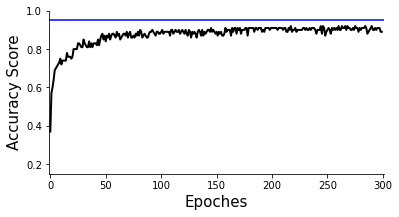

In [189]:
#import SWvisPlot9
ax=SWvisPlot.AccuracyPlot( acc=net.history[:,'valid_acc'] ,accCutoff=0.95,
                 Xlow=-1, Xhigh=len(net.history[:,'valid_acc'])+1,Ylow=0.15, Yhigh=1,
               )

##  epochNum as 25

In [190]:
net=NNclassifer(
   mdf_train_set=mdf_train_set,
    mtrain_index=mtrain_index,
    epochNum=125,
    learningRate= 0.01,
    verbose=0,
       optimizerMmentum=0.75,
     dropout=0.4,
 )

In [191]:
set(dfpfcclus.loc["Cluster"].values)

{'Classical', 'Mesenchymal', 'Neural', 'Proneural'}

In [192]:
mwanted_order =[ 'Classical', 'Mesenchymal', 'Neural', 'Proneural']
 

In [193]:
refcolor_dict = pd.Series({'Classical':  (100, 100, 240),'Mesenchymal':   ( 95, 186,  70),
              'Neural':  (255, 120, 155), 'Proneural': ( 80, 235, 255),'OPC':  (250, 125,  25),
              'Stem cells':    (190, 200, 190)})

In [194]:
mclasses_names[mtrain_index]

array(['Classical', 'Proneural', 'Mesenchymal', 'Mesenchymal',
       'Proneural', 'Classical', 'Proneural', 'Classical', 'Classical',
       'Classical', 'Classical', 'Proneural', 'Mesenchymal', 'Classical',
       'Mesenchymal', 'Mesenchymal', 'Classical', 'Classical',
       'Mesenchymal', 'Classical', 'Proneural', 'Proneural', 'Proneural',
       'Mesenchymal', 'Neural', 'Mesenchymal', 'Mesenchymal', 'Neural',
       'Mesenchymal', 'Proneural', 'Mesenchymal', 'Classical',
       'Proneural', 'Classical', 'Classical', 'Proneural', 'Mesenchymal',
       'Mesenchymal', 'Neural', 'Mesenchymal', 'Mesenchymal', 'Neural',
       'Mesenchymal', 'Classical', 'Mesenchymal', 'Mesenchymal',
       'Mesenchymal', 'Neural', 'Neural', 'Mesenchymal', 'Classical',
       'Classical', 'Classical', 'Classical', 'Proneural', 'Classical',
       'Classical', 'Classical', 'Classical', 'Proneural', 'Neural',
       'Proneural', 'Mesenchymal', 'Mesenchymal', 'Mesenchymal',
       'Classical', 'Mesenchymal

In [195]:
import SWAPLINEmain

In [196]:

mreordername, dfprobRef,refcolor_dict,refdataLR, mreorder_idx =SWAPLINEmain.prediction(
    mwanted_order = mwanted_order, mclasses_names = mclasses_names, mprotogruop = dfpfcclus.loc["Cluster"].values,
     mtrain_index = mtrain_index, net = net, mreorder_ix = None, mdf_train_set = mdf_train_set,   
    learninggroup="train", mcolor_dict=refcolor_dict)
#RadarVisualization

In [198]:
todaytime=f"{datetime.datetime.now():%Y%m%d%I%M%p}"
dfprobRef.to_csv("probability_table%s.tab"%todaytime,sep="\t")
dfclRef.to_csv("Location_table%s.tab"%todaytime,sep="\t")


In [199]:
#import SWAPLINEmain9
dftest0,ratiodf=SWAPLINEmain.permutationTest(mdf_train_set=mdf_train_set,net=net, dfprobRef=dfprobRef,mreorder_ix=mreorder_idx,num=10)
##RadarVisualization

## TCGA GBM CELL

In [201]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_gsm168004_Suva_MacrophageGBM\GSE168004_OSM_celllines_tpm.csv

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_gsm168004_Suva_MacrophageGBM\GSE168004_OSM_celllines_tpm.csv


In [202]:
dfgbm=pd.read_table("GSE168004_OSM_celllines_tpm.csv",index_col=0,header=0,sep=",")

In [203]:

dfgbm.shape

(33538, 2767)

In [204]:
dfgbm.head()

,AAACGCTGTTTACACG-1,AAACGCTTCCTACACC-1,AAAGAACAGTTTGTCG-1,AAAGAACGTCAAGCCC-1,AAAGGATGTGTCCAAT-1,AAAGGGCAGAATCGTA-1,AAAGTCCAGCCATTCA-1,AAAGTGACATTGCTGA-1,AAAGTGATCGTGTGAT-1,AACAACCTCTGGAGAG-1,...,TTTAGTCTCGCACGGT-1,TTTATGCCACCCTAGG-1,TTTCACAAGGTCGACA-1,TTTCAGTCAGAGATGC-1,TTTCATGCAGCTGTCG-1,TTTCATGCATGCCGAC-1,TTTGGAGAGCAAGCCA-1,TTTGGAGAGCGAACTG-1,TTTGGAGGTAGCTGTT-1,TTTGTTGGTTGCCATA-1
MIR1302-2HG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_gsm168004_Suva_MacrophageGBM

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_gsm168004_Suva_MacrophageGBM


In [206]:
dfgbmclus=pd.read_table("GSE168004_OSM_celllines_readme.csv",index_col=0,header=0,sep=",")

In [207]:
dfgbmclus.tail()

,title,source name,organism
Sample name,,,
TTTCATGCATGCCGAC-1,MGG75_OSM,MGG75 GBM cell-line,Homo Sapiens
TTTGGAGAGCAAGCCA-1,MGG75_OSM,MGG75 GBM cell-line,Homo Sapiens
TTTGGAGAGCGAACTG-1,MGG75_OSM,MGG75 GBM cell-line,Homo Sapiens
TTTGGAGGTAGCTGTT-1,MGG75_OSM,MGG75 GBM cell-line,Homo Sapiens
TTTGTTGGTTGCCATA-1,MGG75_OSM,MGG75 GBM cell-line,Homo Sapiens


In [208]:
dfgbmclus.columns=['Cluster', 'source name', 'organism']

In [209]:
dfgbm2=dfgbm.T.join(dfgbmclus.iloc[:,:1],how="inner").T

In [210]:
set(dfgbm2.loc["Cluster"])

{'MGG23_BSA', 'MGG23_OSM', 'MGG75_BSA', 'MGG75_OSM'}

In [211]:
dfclus=dfgbm2.iloc[-1:,:]
dfgbm=dfgbm2.iloc[:-1,:].astype(float)

In [212]:
dfclus.head()

,AAACGCTGTTTACACG-1,AAACGCTTCCTACACC-1,AAAGAACAGTTTGTCG-1,AAAGAACGTCAAGCCC-1,AAAGGATGTGTCCAAT-1,AAAGGGCAGAATCGTA-1,AAAGTCCAGCCATTCA-1,AAAGTGACATTGCTGA-1,AAAGTGATCGTGTGAT-1,AACAACCTCTGGAGAG-1,...,TTTAGTCTCGCACGGT-1,TTTATGCCACCCTAGG-1,TTTCACAAGGTCGACA-1,TTTCAGTCAGAGATGC-1,TTTCATGCAGCTGTCG-1,TTTCATGCATGCCGAC-1,TTTGGAGAGCAAGCCA-1,TTTGGAGAGCGAACTG-1,TTTGGAGGTAGCTGTT-1,TTTGTTGGTTGCCATA-1
Cluster,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,MGG23_BSA,...,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM,MGG75_OSM


In [213]:
dfgbm.head()

,AAACGCTGTTTACACG-1,AAACGCTTCCTACACC-1,AAAGAACAGTTTGTCG-1,AAAGAACGTCAAGCCC-1,AAAGGATGTGTCCAAT-1,AAAGGGCAGAATCGTA-1,AAAGTCCAGCCATTCA-1,AAAGTGACATTGCTGA-1,AAAGTGATCGTGTGAT-1,AACAACCTCTGGAGAG-1,...,TTTAGTCTCGCACGGT-1,TTTATGCCACCCTAGG-1,TTTCACAAGGTCGACA-1,TTTCAGTCAGAGATGC-1,TTTCATGCAGCTGTCG-1,TTTCATGCATGCCGAC-1,TTTGGAGAGCAAGCCA-1,TTTGGAGAGCGAACTG-1,TTTGGAGGTAGCTGTT-1,TTTGTTGGTTGCCATA-1
MIR1302-2HG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
dfgbm.shape

(33538, 2767)

In [221]:
#import prefilteringTest26
df_train_setclpn, dfclpncol,protogruop=prefiltering.MVgene_Scaling(list_genes=None,dfpfc=dfgbm,dfpfcclus=dfclus,mprotogruop=None,
                                                      std_scaling=False,TPTT=10000,
                   sharedMVgenes=mdf_train_set.index.tolist(), score=score, commongene=commongene, thrs=thrs,
                                tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt",  learninggroup="test")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:324: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.astype(float).dropna(0)


In [222]:
df_train_setclpn.shape

(700, 2767)

In [223]:
protogruop

array(['MGG23_BSA', 'MGG23_BSA', 'MGG23_BSA', ..., 'MGG75_OSM',
       'MGG75_OSM', 'MGG75_OSM'], dtype=object)

In [224]:
wanted_orderclpn =['MGG23_BSA', 'MGG23_OSM', 'MGG75_BSA', 'MGG75_OSM']
#bool00clpn=array([True]*len(df_train_setclpn.columns))
reorder_ixclpn = [list(wanted_orderclpn).index(i) for i in wanted_orderclpn]
color_dictclpn = pd.Series({'Classical':  (100, 100, 240),'Mesenchymal':   ( 95, 186,  70),
              'MGG75_OSM':  (55, 120, 55), 'MGG75_BSA': ( 180, 35, 155), 'MGG23_OSM':  (250, 125,  85),
              'MGG23_BSA':    (190, 200, 190)})

In [225]:
#import SWAPLINEmain10
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
#RadarVisualization

## OMS mouse GBM CELL

In [227]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_gsm168004_Suva_MacrophageGBM\GSE168004_OSM_mouse_tpm.csv

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_gsm168004_Suva_MacrophageGBM\GSE168004_OSM_mouse_tpm.csv


In [228]:
dfgbm=pd.read_table("GSE168004_OSM_mouse_tpm.csv",index_col=0,header=0,sep=",")

In [229]:

dfgbm.shape

(46517, 576)

In [230]:
dfgbm.head()

,Lenti_Control_1_Day7_A01.genes.results,Lenti_Control_1_Day7_A02.genes.results,Lenti_Control_1_Day7_A03.genes.results,Lenti_Control_1_Day7_A04.genes.results,Lenti_Control_1_Day7_A05.genes.results,Lenti_Control_1_Day7_A06.genes.results,Lenti_Control_1_Day7_A07.genes.results,Lenti_Control_1_Day7_A08.genes.results,Lenti_Control_1_Day7_A09.genes.results,Lenti_Control_1_Day7_A10.genes.results,...,TH_OSM1_0239_H03.genes.results,TH_OSM1_0239_H04.genes.results,TH_OSM1_0239_H05.genes.results,TH_OSM1_0239_H06.genes.results,TH_OSM1_0239_H07.genes.results,TH_OSM1_0239_H08.genes.results,TH_OSM1_0239_H09.genes.results,TH_OSM1_0239_H10.genes.results,TH_OSM1_0239_H11.genes.results,TH_OSM1_0239_H12.genes.results
Gnai3,71.2,125.11,0.0,1.0,201.1,111.38,80.01,94.05,116.73,7.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pbsn,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cdc45,0.0,56.35,5.0,0.0,0.0,89.77,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H19,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Scml2,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,1.91,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [231]:
cluslist=[]
for item in dfgbm.columns:
    cluslist.append("_".join(item.split("_")[:2]))

In [232]:
cluslist

['Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Control',
 'Lenti_Co

In [233]:
dfgbm.loc["Cluster"]=cluslist

In [234]:
dfclus=dfgbm.iloc[-1:,:]
dfgbm=dfgbm.iloc[:-1,:].astype(float)

In [235]:
dfclus.head()

,Lenti_Control_1_Day7_A01.genes.results,Lenti_Control_1_Day7_A02.genes.results,Lenti_Control_1_Day7_A03.genes.results,Lenti_Control_1_Day7_A04.genes.results,Lenti_Control_1_Day7_A05.genes.results,Lenti_Control_1_Day7_A06.genes.results,Lenti_Control_1_Day7_A07.genes.results,Lenti_Control_1_Day7_A08.genes.results,Lenti_Control_1_Day7_A09.genes.results,Lenti_Control_1_Day7_A10.genes.results,...,TH_OSM1_0239_H03.genes.results,TH_OSM1_0239_H04.genes.results,TH_OSM1_0239_H05.genes.results,TH_OSM1_0239_H06.genes.results,TH_OSM1_0239_H07.genes.results,TH_OSM1_0239_H08.genes.results,TH_OSM1_0239_H09.genes.results,TH_OSM1_0239_H10.genes.results,TH_OSM1_0239_H11.genes.results,TH_OSM1_0239_H12.genes.results
Cluster,Lenti_Control,Lenti_Control,Lenti_Control,Lenti_Control,Lenti_Control,Lenti_Control,Lenti_Control,Lenti_Control,Lenti_Control,Lenti_Control,...,TH_OSM1,TH_OSM1,TH_OSM1,TH_OSM1,TH_OSM1,TH_OSM1,TH_OSM1,TH_OSM1,TH_OSM1,TH_OSM1


In [236]:
dfgbm.head()

,Lenti_Control_1_Day7_A01.genes.results,Lenti_Control_1_Day7_A02.genes.results,Lenti_Control_1_Day7_A03.genes.results,Lenti_Control_1_Day7_A04.genes.results,Lenti_Control_1_Day7_A05.genes.results,Lenti_Control_1_Day7_A06.genes.results,Lenti_Control_1_Day7_A07.genes.results,Lenti_Control_1_Day7_A08.genes.results,Lenti_Control_1_Day7_A09.genes.results,Lenti_Control_1_Day7_A10.genes.results,...,TH_OSM1_0239_H03.genes.results,TH_OSM1_0239_H04.genes.results,TH_OSM1_0239_H05.genes.results,TH_OSM1_0239_H06.genes.results,TH_OSM1_0239_H07.genes.results,TH_OSM1_0239_H08.genes.results,TH_OSM1_0239_H09.genes.results,TH_OSM1_0239_H10.genes.results,TH_OSM1_0239_H11.genes.results,TH_OSM1_0239_H12.genes.results
Gnai3,71.2,125.11,0.0,1.0,201.1,111.38,80.01,94.05,116.73,7.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pbsn,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cdc45,0.0,56.35,5.0,0.0,0.0,89.77,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H19,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Scml2,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,1.91,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [237]:
dfgbm.shape

(46517, 576)

dfgbm=df.astype(float)
dfpfc=dfm.astype(float)
samegene=set(dfgbm.index) & set(dfpfc.index)
len(samegene)

In [238]:
path="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/"
dictfilename1="Homologene_mouse2human_dict2.pickle"
dfgbm=prefiltering.TransSpeciesGeneName(dfm=dfgbm, dictfilename=dictfilename1, path=path)
samegene=set(dfgbm.index)
len(samegene)

15557

In [239]:
#import prefilteringTest26
df_train_setclpn, dfclpncol,protogruop=prefiltering.MVgene_Scaling(list_genes=None,dfpfc=dfgbm,dfpfcclus=dfclus,mprotogruop=None,
                                                      std_scaling=True,TPTT=dfpfc.mean(1),
                   sharedMVgenes=mdf_train_set.index.tolist(), score=score, commongene=commongene, thrs=thrs,
                                tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt",  learninggroup="test")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:322: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)


In [240]:
df_train_setclpn.shape

(700, 576)

In [241]:
protogruop

array(['Lenti_Control', 'Lenti_Control', 'Lenti_Control', 'Lenti_Control',
       'Lenti_Control', 'Lenti_Control', 'Lenti_Control', 'Lenti_Control',
       'Lenti_Control', 'Lenti_Control', 'Lenti_Control', 'Lenti_Control',
       'Lenti_Control', 'Lenti_Control', 'Lenti_Control', 'Lenti_Control',
       'Lenti_Control', 'Lenti_Control', 'Lenti_Control', 'Lenti_Control',
       'Lenti_Control', 'Lenti_Control', 'Lenti_Control', 'Lenti_Control',
       'Lenti_Control', 'Lenti_Control', 'Lenti_Control', 'Lenti_Control',
       'Lenti_Control', 'Lenti_Control', 'Lenti_Control', 'Lenti_Control',
       'Lenti_Control', 'Lenti_Control', 'Lenti_Control', 'Lenti_Control',
       'Lenti_Control', 'Lenti_Control', 'Lenti_Control', 'Lenti_Control',
       'Lenti_Control', 'Lenti_Control', 'Lenti_Control', 'Lenti_Control',
       'Lenti_Control', 'Lenti_Control', 'Lenti_Control', 'Lenti_Control',
       'Lenti_Control', 'Lenti_Control', 'Lenti_Control', 'Lenti_Control',
       'Lenti_Control', '

In [242]:
wanted_orderclpn =['Lenti_Control', 'Lenti_OSM', 'TH_CTR', 'TH_OSM1']
#bool00clpn=array([True]*len(df_train_setclpn.columns))
#reorder_ixclpn = [list(classes_namesclpn).index(i) for i in wanted_orderclpn]
color_dictclpn = pd.Series({'Lenti_Control':  (100, 10, 240),'Lenti_OSM':   ( 95, 86,  70),
              'TH_CTR':  (55, 120, 155),'TH_OSM1': ( 80, 235, 55), 'MGG23_OSM':  (250, 125,  25),
              'MGG23_BSA':    (190, 200, 190)})

In [243]:
#import SWAPLINEmain10
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
#RadarVisualization

## PE_GBM CELL

In [307]:
dfgbm = pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/GBMprim_UMI_WithCluster_New.tab", index_col =0 ,header=0, sep="\t")
dfgbm.shape

<ipython-input-307-dfe870e7b549>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

(20129, 4073)

In [308]:
dfgbm.head()

,KI009-1772-122-307-D03,KI009-1772-122-307-F03,KI009-1772-122-307-H04,KI009-1772-122-307-E12,KI009-1772-122-308-D03,KI009-1772-122-308-A08,KI009-1772-122-308-C08,KI009-1772-122-308-G09,KI009-1772-122-308-G10,KI009-1772-122-308-H10,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOC2L,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [309]:
dfgbm.tail()

,KI009-1772-122-307-D03,KI009-1772-122-307-F03,KI009-1772-122-307-H04,KI009-1772-122-307-E12,KI009-1772-122-308-D03,KI009-1772-122-308-A08,KI009-1772-122-308-C08,KI009-1772-122-308-G09,KI009-1772-122-308-G10,KI009-1772-122-308-H10,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
CDY1-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPRY3-loc2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
VAMP7-loc1,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,2,0,0,1,0,0
IL9R-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cluster,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,CD45+,...,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09


In [310]:
dfgbm=dfgbm.T.loc[dfgbm.loc["Cluster"]!='CD45+']
dfgbm.shape

(4044, 20129)

In [311]:
dfgbm=dfgbm.T
set(dfgbm.loc["Cluster"])

{'CL1_KI09',
 'CL2_KI12',
 'CL3_KI07',
 'CL4_KI12',
 'CL5_KI01',
 'CL6_KI03.07',
 'CL7_KI06',
 'CL8_KI16',
 'MS1_KI24',
 'MS2_KI09',
 'MS3',
 'MS4_KI09',
 'MS5',
 'MS6_KI17.05',
 'MS7_KI09',
 'MS8_KI16',
 'NL1_KI15.12',
 'PN1_KI15.12.08.01',
 'PN2_KI15'}

In [312]:
dfclus=dfgbm.iloc[-1:,:]
dfgbm=dfgbm.iloc[:-1,:]

In [313]:
dfclus.head()

,KI009-1772-122-307-C01,KI009-1772-122-307-E01,KI009-1772-122-307-F01,KI009-1772-122-307-C02,KI009-1772-122-307-F02,KI009-1772-122-307-B03,KI009-1772-122-307-C03,KI009-1772-122-307-G04,KI009-1772-122-307-C06,KI009-1772-122-307-C07,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
Cluster,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,CL1_KI09,...,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09,MS7_KI09


In [314]:
dfgbm.head()

,KI009-1772-122-307-C01,KI009-1772-122-307-E01,KI009-1772-122-307-F01,KI009-1772-122-307-C02,KI009-1772-122-307-F02,KI009-1772-122-307-B03,KI009-1772-122-307-C03,KI009-1772-122-307-G04,KI009-1772-122-307-C06,KI009-1772-122-307-C07,...,KI009-1772-122-308-G07,KI009-1772-122-308-H07,KI009-1772-122-308-D08,KI009-1772-122-308-E09,KI009-1772-122-308-H09,KI009-1772-122-308-A10,KI009-1772-122-308-F10,KI009-1772-122-308-A11,KI009-1772-122-308-B11,KI009-1772-122-308-H11
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F16-loc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOC2L,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [315]:
#import prefilteringTest26
score=0
thrs=0
commongene=mdf_train_set.index.tolist()
df_train_setclpn, dfclpncol,protogruop=prefiltering.MVgene_Scaling(list_genes=None,dfpfc=dfgbm.astype(float),dfpfcclus=dfclus,mprotogruop=None,
                                                      std_scaling=False,TPTT=10000,
                   sharedMVgenes=mdf_train_set.index.tolist(), score=score, commongene=commongene, thrs=thrs,
                                tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt",  learninggroup="test")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:324: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.astype(float).dropna(0)


In [316]:
df_train_setclpn.shape

(700, 4044)

In [317]:
protogruop

array(['CL1_KI09', 'CL1_KI09', 'CL1_KI09', ..., 'MS7_KI09', 'MS7_KI09',
       'MS7_KI09'], dtype=object)

In [318]:
wanted_orderclpn =['CL1_KI09',
 'CL2_KI12',
 'CL3_KI07',
 'CL4_KI12',
 'CL5_KI01',
 'CL6_KI03.07',
 'CL7_KI06',
 'CL8_KI16',
 'MS1_KI24',
 'MS2_KI09',
 'MS3',
 'MS4_KI09',
 'MS5',
 'MS6_KI17.05',
 'MS7_KI09',
 'MS8_KI16',
 'NL1_KI15.12',
 'PN1_KI15.12.08.01',
 'PN2_KI15']
color_dictclpn=pd.Series({'CL1_KI09':  ( 10, 10, 250),'CL2_KI12': (215, 105,  30),'CL3_KI07':   (117, 245, 7) ,
              'PN1_KI15.12.08.01':    (111,111,111),'CL5_KI01': (79,47,79)  ,'PN2_KI15':    (180, 140, 130),
              'CL4_KI12':  (100, 180, 240),'MS8_KI16': ( 80, 235, 255),'CL6_KI03.07':(139,69,19),
              'CL7_KI06':(10, 120, 190),'CL8_KI16':(230, 10, 100),'NL1_KI15.12':  (120, 15,215),
            'MS1_KI24':   (190,  10,  10),'MS2_KI09': (225, 160,  30),'MS3':   (217, 245,   7) ,
            'MS4_KI09': (69,155,110)  ,'MS5':  (100, 100, 240),'MS6_KI17.05':  (190, 200, 190),'MS7_KI09':   ( 50, 180, 180),
                     })

In [319]:
#import SWAPLINEmain10
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
#RadarVisualization

# Suva2019_GBM

In [265]:
dfsample = pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/2019Suva/IDHwtGBM.processed.SS2.logTPM.txt/IDHwtGBM.processed.SS2.logTPM.txt", index_col =0 ,header=0, sep="\t")
dfsample.shape


(23686, 7930)

In [266]:
dfsampleclus = pd.read_table("D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/2019Suva/IDHwtGBM.Metadata.SS2.txt", index_col =0 ,header=0, sep="\t")
dfsampleclus.shape


(7931, 13)

In [267]:
dfsampleclus.head()

,Sample,GBM_Type,Cell_Type,Cross_Section,Genes_Expressed,AC-like,MES1-like,MES2-like,NPC1-like,NPC2-like,OPC-like,G1S,G2M
NAME,,,,,,,,,,,,,
TYPE,group,group,group,group,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
MGH100-P5-A01,MGH100,Adult,Malignant,NaN,7403,2.29724756105443,0.311211961707847,-0.293633485956514,-0.516822723797423,-0.801937232473608,0.417244989115182,-0.951816425952768,-0.310899447575504
MGH100-P5-A03,MGH100,Adult,Malignant,NaN,8861,-0.559428510000344,-1.20298531371585,-0.579529857513807,0.893472111534824,-0.149805199002272,0.896569778332911,3.62443186028081,1.47087171714853
MGH100-P5-A04,MGH100,Adult,Malignant,NaN,5957,-1.08740329652001,-0.0734224534184421,2.25051898663126,-1.65942656638598,-0.860216154455462,-1.42107814485363,-0.346711265261959,-0.303424805657141
MGH100-P5-A06,MGH100,Adult,Malignant,NaN,7320,-0.646200158140011,-0.541540113216199,-0.482611877864668,0.564371473329837,-0.043081960262292,0.53108354241134,3.02202290807356,0.821238632091698


In [268]:
set(dfsampleclus["Cell_Type"])

{'Macrophage', 'Malignant', 'Oligodendrocyte', 'T-cell', 'group'}

In [269]:
dfsampleclus=dfsampleclus.loc[dfsampleclus["Cell_Type"].isin(['Malignant'])]
dfsampleclus.shape

(6863, 13)

In [270]:
dfsample=dfsample[dfsampleclus.index].dropna()
dfsample.shape

(23686, 6863)

In [271]:
dfsample.head()

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A06,MGH100-P5-A07,MGH100-P5-A08,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-A12,MGH100-P5-B02,...,BT920-P4-G12,BT920-P4-H02,BT920-P4-H03,BT920-P4-H04,BT920-P4-H05,BT920-P4-H08,BT920-P4-H09,BT920-P4-H10,BT920-P4-H11,BT920-P4-H12
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,1.409798,0.436162,0.00000,0.0,0.000000,0.508936,0.889084,2.948414,1.025029,1.393416,...,0.0000,0.0,0.0000,1.6955,0.0,0.000000,0.00000,2.0841,0.0000,0.0000
A1BG-AS1,0.000000,2.499272,3.74771,0.0,3.229742,1.969749,0.000000,0.000000,2.650535,0.000000,...,0.0000,0.0,0.0000,0.0000,0.0,3.283000,0.00000,0.0000,0.0000,3.6513
A1CF,0.000000,0.000000,0.00000,0.0,0.000000,0.108357,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0,0.0000,0.0000,0.0,0.071763,0.00000,0.0000,0.0000,0.0000
A2M,2.850199,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.468844,0.000000,...,2.7793,0.0,4.0601,1.4082,0.0,7.084700,5.51510,5.0966,2.2975,5.5945
A2M-AS1,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0,0.0000,0.0000,0.0,0.552870,0.49978,0.0000,0.0000,0.0000


In [272]:
Patientlist=[]
for item in dfsample.columns:
    temp=item.split("-")[0]
    if temp[:3]=="MGH":
        temp=temp[:6]
    Patientlist.append(temp)
len(Patientlist)

6863

In [273]:
set(Patientlist)

{'BT1160',
 'BT1187',
 'BT749',
 'BT771',
 'BT786',
 'BT830',
 'BT920',
 'MGH100',
 'MGH101',
 'MGH102',
 'MGH104',
 'MGH105',
 'MGH106',
 'MGH110',
 'MGH113',
 'MGH115',
 'MGH121',
 'MGH122',
 'MGH124',
 'MGH125',
 'MGH128',
 'MGH129',
 'MGH136',
 'MGH143',
 'MGH151',
 'MGH152',
 'MGH66',
 'MGH85'}

In [274]:
dfsample.loc["PaitentID"]=Patientlist

In [275]:
dfsampleclus=dfsample.iloc[-2:,:]
dfsampleclus.head()

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A06,MGH100-P5-A07,MGH100-P5-A08,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-A12,MGH100-P5-B02,...,BT920-P4-G12,BT920-P4-H02,BT920-P4-H03,BT920-P4-H04,BT920-P4-H05,BT920-P4-H08,BT920-P4-H09,BT920-P4-H10,BT920-P4-H11,BT920-P4-H12
GENE,,,,,,,,,,,,,,,,,,,,,
ZZZ3,0.0,0.0,0.0,0.0,2.908621,2.428946,0.0,0.0,3.181262,0.0,...,4.8348,0.0,0.0,0.0,0.0,2.5852,0.0,0.0,0.0,0.0
PaitentID,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,...,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920


In [276]:
dfsample=dfsample.iloc[:-1,:]
dfsample.head()

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A06,MGH100-P5-A07,MGH100-P5-A08,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-A12,MGH100-P5-B02,...,BT920-P4-G12,BT920-P4-H02,BT920-P4-H03,BT920-P4-H04,BT920-P4-H05,BT920-P4-H08,BT920-P4-H09,BT920-P4-H10,BT920-P4-H11,BT920-P4-H12
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,1.409798,0.436162,0.0,0.0,0.0,0.508936,0.889084,2.948414,1.025029,1.393416,...,0.0,0.0,0.0,1.6955,0.0,0.0,0.0,2.0841,0.0,0.0
A1BG-AS1,0.0,2.499272,3.74771,0.0,3.229742,1.969749,0.0,0.0,2.650535,0.0,...,0.0,0.0,0.0,0.0,0.0,3.283,0.0,0.0,0.0,3.6513
A1CF,0.0,0.0,0.0,0.0,0.0,0.108357,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.071763,0.0,0.0,0.0,0.0
A2M,2.850199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.468844,0.0,...,2.7793,0.0,4.0601,1.4082,0.0,7.0847,5.5151,5.0966,2.2975,5.5945
A2M-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.55287,0.49978,0.0,0.0,0.0


In [279]:
dfclus=dfsampleclus
dfclus.index=["Unknown","Cluster"]
dfclus

,MGH100-P5-A01,MGH100-P5-A03,MGH100-P5-A04,MGH100-P5-A06,MGH100-P5-A07,MGH100-P5-A08,MGH100-P5-A09,MGH100-P5-A10,MGH100-P5-A12,MGH100-P5-B02,...,BT920-P4-G12,BT920-P4-H02,BT920-P4-H03,BT920-P4-H04,BT920-P4-H05,BT920-P4-H08,BT920-P4-H09,BT920-P4-H10,BT920-P4-H11,BT920-P4-H12
Unknown,0.0,0.0,0.0,0.0,2.908621,2.428946,0.0,0.0,3.181262,0.0,...,4.8348,0.0,0.0,0.0,0.0,2.5852,0.0,0.0,0.0,0.0
Cluster,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,MGH100,...,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920,BT920


In [285]:
#import prefilteringTest26
df_train_setclpn, dfclpncol,protogruop=prefiltering.MVgene_Scaling(list_genes=None,dfpfc=dfgbm.astype(float),dfpfcclus=dfclus,mprotogruop=None,
                                                      std_scaling=True,TPTT=dfpfc.mean(1),
                   sharedMVgenes=mdf_train_set.index.tolist(), score=score, commongene=commongene, thrs=thrs,
                                tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt",  learninggroup="test")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:322: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)


In [286]:
wanted_orderclpn =['BT1160',
 'BT1187',
 'BT749',
 'BT771',
 'BT786',
 'BT830',
 'BT920',
 'MGH100',
 'MGH101',
 'MGH102',
 'MGH104',
 'MGH105',
 'MGH106',
 'MGH110',
 'MGH113',
 'MGH115',
 'MGH121',
 'MGH122',
 'MGH124',
 'MGH125',
 'MGH128',
 'MGH129',
 'MGH136',
 'MGH143',
 'MGH151',
 'MGH152',
 'MGH66',
 'MGH85']

color_dictclpn = pd.Series({'BT1160':  ( 50, 180, 180),'BT1187': (225, 160,  30),'BT749':    (217, 245,   7),
             'BT771':    (70, 80, 10), 'BT786':   (130, 140, 140),'BT830':    (80, 140, 130),
             'BT920':  (100, 100, 240),'MGH100': ( 80, 35, 255),'MGH101':(190, 235, 255),
              'MGH102':(210, 255, 215),'MGH104':(230, 140, 120),'MGH105':  (190,  10,  10),
                           
                           'MGH106':  ( 50, 80, 180), 'MGH110': (25, 160,  30),'MGH113':    (27, 245,   7),
            'MGH115':    (170, 80, 10), 'MGH121':   (130, 140, 140), 'MGH122':    (80, 140, 30),
              'MGH124':  (100, 10, 240),'MGH125': ( 180, 35, 255),'MGH128':(190, 235, 55),
              'MGH129':(210, 55, 215),'MGH136':(20, 140, 120),'MGH143':  (190,  210,  10),
                    'MGH151':  ( 30, 80, 80), 'MGH152': (25, 60,  30),'MGH66':    (27, 245,  207),
            'MGH85':    (70, 80, 210),      
                           
                           })

In [287]:
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
#RadarVisualization

## Couturier2020_DevGBM

In [289]:
import loompy

In [290]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_Couturier2020_DevGBM

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\GBM_Couturier2020_DevGBM


In [291]:
ds=loompy.connect("20210809FinalMatrixWithCluster.loom")

In [292]:
dfgbm=pd.DataFrame(ds[:,:])

In [293]:
dfgbm.index=ds.ra["Gene"]
dfgbm.columns=ds.ca['CellID']
dfgbm.loc["PatientID"]=ds.ca['PatientID']
dfgbm.loc["Cluster"]=ds.ca['Cluster']

In [294]:
dfclus=dfgbm.iloc[-2:,:]
dfgbm=dfgbm.iloc[:-2,:].astype(float)

In [303]:
#import prefilteringTest26
df_train_setclpn, dfclpncol,protogruop=prefiltering.MVgene_Scaling(list_genes=None,dfpfc=dfgbm.astype(float),dfpfcclus=dfclus,mprotogruop=None,
                                                      std_scaling=False,TPTT=1000000,
                   sharedMVgenes=mdf_train_set.index.tolist(), score=score, commongene=commongene, thrs=thrs,
                                tftable="D:/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt",  learninggroup="test")

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\ready_SWAPLINE\prefiltering.py:324: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.astype(float).dropna(0)


In [304]:
wanted_orderclpn =['Astro', 'Mesenchymal', 'Neuronal', 'Oligo', 'Progenitor', 'Unassigned']
#bool00clpn=array([True]*len(df_train_setclpn.columns))
#reorder_ixclpn = [list(classes_namesclpn).index(i) for i in wanted_orderclpn]
color_dictclpn = pd.Series({'Astro':  (100, 100, 240), 'Neuronal':   ( 0, 86,  255),
              'Mesenchymal':  (55, 120, 55), 'Oligo': ( 255,185, 5), 'Unassigned':  (192,192,192),
             'Progenitor':    (190, 0, 0)})

In [305]:
mreordername, dfprobCL, color_dictclpn, dataclpn=SWAPLINEmain.prediction(mwanted_order=wanted_orderclpn ,  mclasses_names = mclasses_names, 
     mtrain_index = mtrain_index, net = net, mreorder_ix =mreorder_idx, 
                                            mprotogruop=protogruop,  mdf_train_set=df_train_setclpn, mcolor_dict=color_dictclpn, learninggroup="test" )
#RadarVisualization